# Introducción a Aprendizaje Reforzado

## Paradigmas de aprendizaje

**Aprendizaje Supervisado:** Tenemos **ejemplos etiquetados** $(x, y)$ 

> Buscamos un mapeo $f_\theta : x \to y$

el cual aprendemos optimizando una **función de costo**, *e.g.*

$$
\min_w \sum_{i=1}^N y_i \log (\hat y_i) \quad \hat y_i = f_\theta (x_i)
$$
<br>

<div>
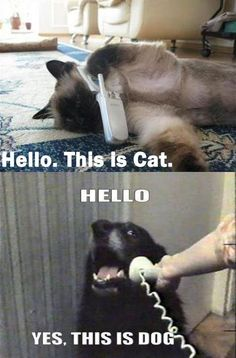
</div>

**Aprendizaje No Supervisado:** Tenemos **ejemplos sin etiqueta** $(x)$ 

> Buscamos una representación de los datos 

la cual aprendemos optimizando una **función de costo**, *e.g.*

$$
\min  \sum_{i=1}^N \sum_{k=1}^K w_{ik} \|x_i - \mu_k\|^2 \quad w_{ik} = \begin{cases} 1 & k = \text{arg}\min_j \| x_i - \mu_j\|^2 \\ 0 & \sim \end{cases} 
$$ 

<br>
<div>
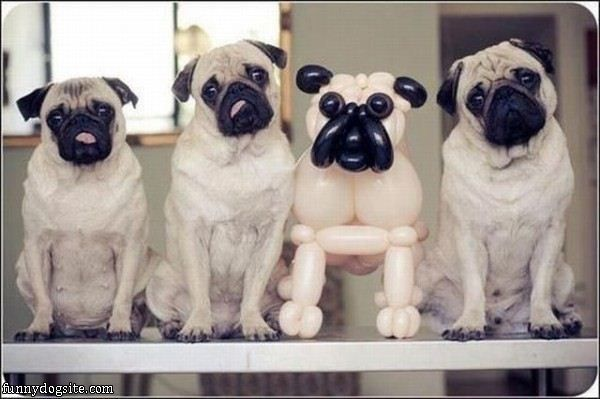
</div>

**Aprendizaje Reforzado (RL):** El problema fundamental de RL es 

> **aprender** a tomar la mejor **decisión** en un **ambiente** cambiante

¿Quién toma las decisiones?

> El sistema que toma las decisiones e interactua con el ambiente se llama **agente**

¿Cómo se cual es la mejor decisión?

> La mejor decisión es aquella que obtiene mayor **recompensa**

<br>
<div>
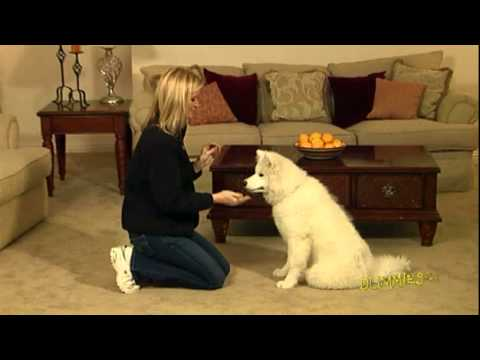
</div>

Esto supone diferencias importantes con los paradigmas de Machine Learning anteriores. Definamos estos componentes resaltando las diferencias a continuación

## Componentes de Aprendizaje Reforzado

**Ambiente y Estado**

En lugar de ejemplos existe un **ambiente o mundo** el cual podemos observar

Nuestra perceción del ambiente no siempre es completa

El ambiente se representa por un vector denominado **estado**

**Acciones**

El agente no retorna predicciones sino que toma **decisiones**

En cada instante el agente escoge y realiza una **acción**

Existen **consecuencias**, las acciones realizadas pueden modificar el ambiente

**Recompensa**

La retroalimentación del agente no proviene de etiquetas sino de una **señal numérica escalar llamada recompensa**

La recompensa está asociada a uno o más estados

La recompensa puede ser positiva o negativa



**Diferencias clave**

- Supervisión: Al agente no se le dice que acción es buena, sino que estados son buenos
- Prueba y error: El agente debe descubrir que acción le entrega la mayor recompensa probándolas una a una
- Temporalidad: El entrenamiento y la ejecución son secuenciales, no se puede asumir iid
- Retraso en la retroalimentación: Las recompensas pueden demorar en llegar, las acciones pueden no traer recompensa inmediata pero si en el futuro



**Objetivo del agente**

> Seleccionar acciones para maximizar la **recompensa acumulada futura**

En ciertos casos podría ser mejor abandonar una recompensa intermedia en pos de obtener una mayor recompensa final

**Hipótesis de recompensa**

> Todo objetivo puede ser representado mediante la maximización de la recompensa acumulada esperada



**La vida de una gente**

> Un agente de RL debe tener objetivos, debe poder sentir su ambiente y debe ser capaz de actuar sobre el mismo 


Tipicamente asumiremos que el tiempo es discreto $t=0, 1, 2, 3, ...$

En cada tiempo instante $t$ el agente
1. **recibe recompensa del ambiente:** $R_t$
1. **observa el ambiente:** $S_t$
1. **realiza una acción:** $A_t$


o en pseudo-código

    for t in 1, 2, 3, ...., N
        get Rt
        get St
        do At
        
o en diagrama (Sutton & Barto, Fig 3.1):

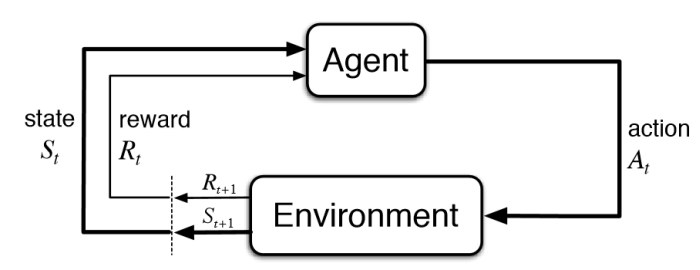

Luego la **historia** de un agente se puede definir como la siguiente trayectoria

$$
H_t = (S_0, A_0, R_1, S_1, A_1, \ldots, R_{t-1}, S_{t-1}, A_{t-1}, R_t, S_t, A_t)
$$

**Discusión**

¿Puedes reconocer los agentes, las acciones, el ambiente, la recompensa y demás elementos de RL en los siguientes ejemplos?

¿Se podría resolver este problema usando aprendizaje supervisado? ¿Cuáles serían las limitaciones?

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("60pwnLB0DqY", width=800, height=400)

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("Ev0wpVB7OEs", width=800, height=400)

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("lpi19vExbzc", width=800, height=400)

Ref: Sección 1.2, Sutton & Barto

> Phil prepares his breakfast. Closely examined, even this apparently mundane
activity reveals a complex web of conditional behavior and interlocking goal–subgoal
relationships: walking to the cupboard, opening it, selecting a cereal box, then
reaching for, grasping, and retrieving the box. Other complex, tuned, interactive
sequences of behavior are required to obtain a bowl, spoon, and milk carton. Each
step involves a series of eye movements to obtain information and to guide reaching
and locomotion. Rapid judgments are continually made about how to carry the
objects or whether it is better to ferry some of them to the dining table before
obtaining others. Each step is guided by goals, such as grasping a spoon or getting
to the refrigerator, and is in service of other goals, such as having the spoon to eat
with once the cereal is prepared and ultimately obtaining nourishment. Whether
he is aware of it or not, Phil is accessing information about the state of his body
that determines his nutritional needs, level of hunger, and food preferences.


(Relacionado: https://youtu.be/E2evC2xTNWg)

**Discusión**


Considere este [listado de ejemplos de aplicación de RL](https://towardsdatascience.com/applications-of-reinforcement-learning-in-real-world-1a94955bcd12)


¿Qué tienen estos ejemplos en común?

> Interacción entre un agente que toma decisiones y su ambiente

> El agente trata de cumplir una meta a pesar de la incerteza del ambiente

> El agente usa la experiencia que adquiere para mejorar su comportamiento

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("qBZPSTR96N4", width=800, height=400)

[Robot PR1](https://ieeexplore.ieee.org/document/4543527) haciendo todo tipo de tareas domésticas

El video es un montaje ya que PR1 está siendo operado remotamente por un humano

> La habilidad motriz ya es suficiente, el desafio pendiente está en los algoritmos


## El agente en acción

Asumamos que nuestro agente tiene un número limitado de acciones posibles

$$
\mathcal{A} = \{a_1, a_2, a_3, \ldots, a_N\}
$$

En cada instante $t$ el agente escoge una acción en base al estado

La decisión se hace según una función denominada **política** (*policy*)

$$
\pi : \mathcal{S} \to \mathcal{A}
$$

La política es un mapa entre el espacio de estados y el espacio de acciones

**Política determinista**

La política está representada por una función

$$
a = \pi (s)
$$

Ej: Si tengo hambre y el timbre no está sonando apreto el timbre

**Política estocástica**

La política está representada por una distribución

$$
a \sim \pi(A|S) = P(A=a|S=s)
$$

Ej: Si tengo hambre y el timbre no está sonando 

- 9 de 10 veces apreto el timbre
- 1 de 10 veces aparece una mosca que me distrae y lo dejo en paz

En promedio apreto el timbre un 90% de las veces que me da hambre

## Procesos de decisión de Markov

El formalismo tras RL se basa en la teoría de **Sistemas Dinámicos** y **Control óptimo** 

En particular se sustenta en los **procesos de decisión de Markov** (*Markov Decision Process*) que a su vez se basa en la **cadena de Markov** (*Markov Chain*)

En una cadena de Markov tenemos 

- un conjunto de estados posibles $\mathcal{S}$ 
- un modelo de transición $T(s, s')$ 

El modelo representa la probablidad de pasar de un estado $s$ a otro $s'$

Además se cumple la **propiedad de Markov**

> El estado futuro es condicionalmente independiente del pasado dado presente

Que matematicamente, para un instante $t$ sería

$$
p(s_{t+1}| s_t, s_{t-1}, s_{t-2}, \ldots, s_2, s_1) = p(s_{t+1}| s_t)
$$

>El estado actual es un estadístico suficiente del futuro

**Ejemplo:** Queremos predecir el clima de Valdivia por medio de un modelo de cadena de Markov

Asumiremos que el clima de mañana es perfectamente predecible a partir del clima de hoy

Sean dos estados

- $s_A$ Luvioso
- $s_B$ Soleado

Con probabilidades condicionales $p(s_A|s_A) = 0.8$, $(s_B|s_A) = 0.2$, $P(s_A|s_B) = 0.5$ y $P(s_B|s_B) = 0.5$

La matriz de transición de la cadena es

$$
T = \begin{pmatrix} 0.8 & 0.5 \\ 0.2 & 0.5 \end{pmatrix}
$$

que también se puede visualizar como un mapa de transición

Si está lloviendo hoy, ¿Cuál es la probabilidad de que llueva mañana, en tres dias más y en una semana más?

In [ ]:
import numpy as np 

s = np.array([1, 0])
T = np.array([[0.8, 0.5],[0.2, 0.5]])

np.dot(np.linalg.matrix_power(T, 2), s)

¿Puedes explicar de dónde sale este resultado?

**De Cadena de Markov a Proceso de Decisión de Markov (MDP)**

El MDP es una reinterpretación de la cadena de Markov 

El MDP modela un agente que toma decisiones

En el MDP tenemos 
- un conjunto de estados posibles $\mathcal{S}$
- un conjunto de acciones posibles $\mathcal{A}$
- una función de recompensa $R(s)$
- una modelo de transición de tres variables $T(s, a, s')$ 

Ahora el modelo se interpreta como la probabilidad de llegar a $s'$ si estaba en $s$ y ejecuté $a$

Dado el estado y la acción actual, el proximo estado no depende del pasado: **Propiedad de Markov**

La existencia de $R(s)$ nos dice que algunos estados son más deseables que otros

**Discusión: Aspiradora robot**

Sea una robo-aspiradora encargada de limpiar nuestra habitación

<div>
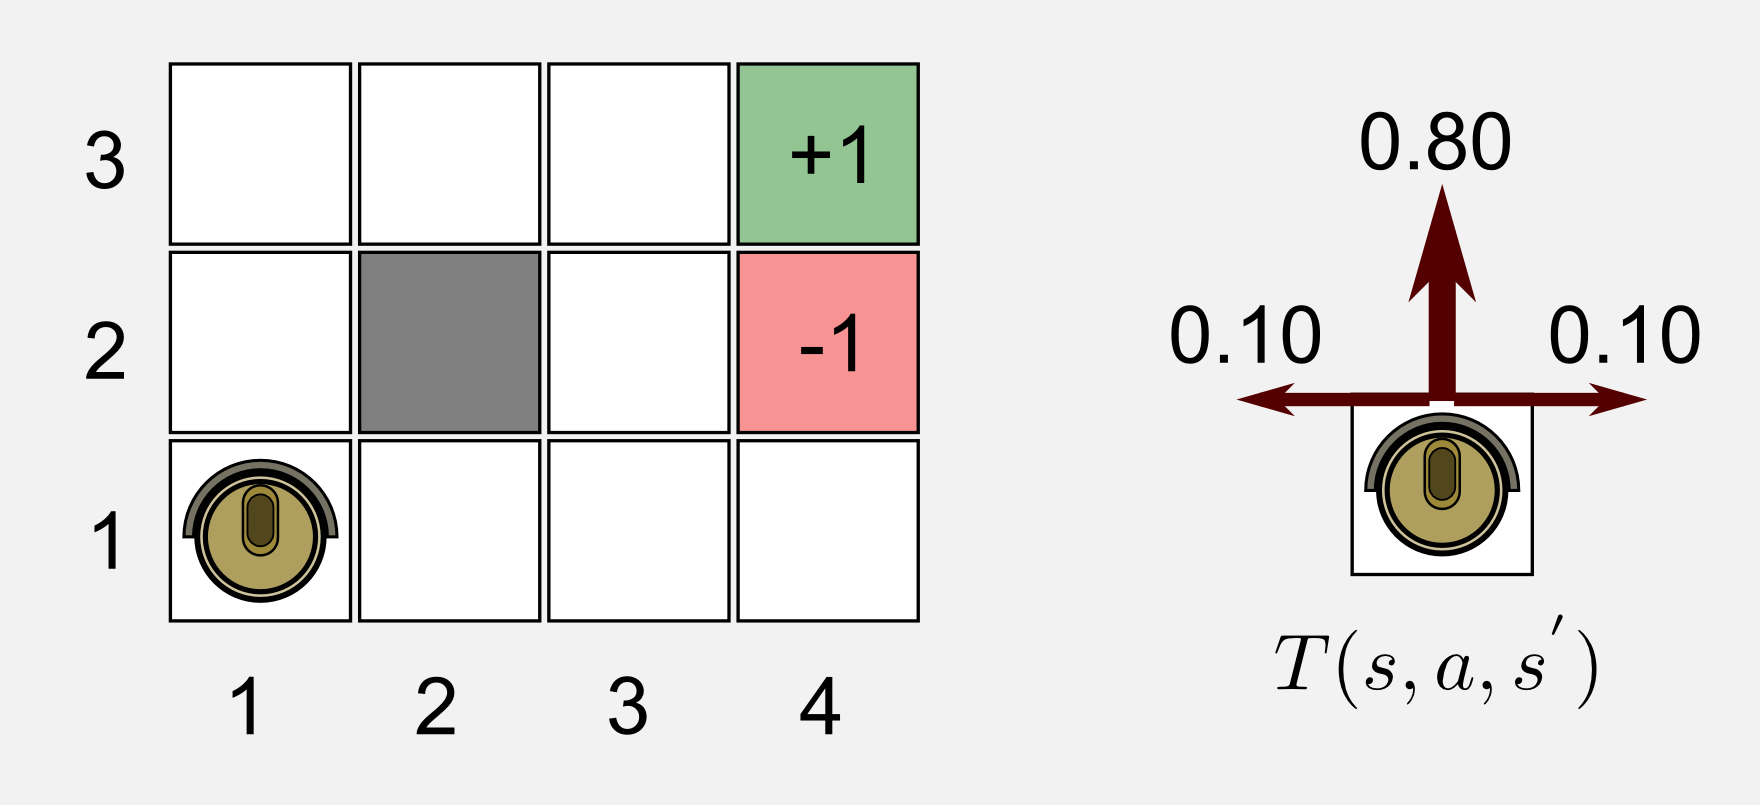
</div>

Nuestra habitación puede discretarse en $3\times 4 = 12$ bloques donde sólo 11 son accesibles por la aspiradora

- La aspiradora parte en el espacio $(1,1)$
- La estación de carga $(4,3)$ tiene una recompensa $+1$
- La escalera $(4, 2)$ tiene una recompensa $-1$
- Todos los demás cuadros tienen una recompensa $-0.04$
- La aspiradora rebota con las paredes y con el obstáculo
- El espacio tiene cuatro acciones, moverse al {N, S, E, O} 

Si el ambiente es determinista

¿Cúal es la mejor política?

Asumamos que ahora existe un elemento estocástico en el ambiente

Cuando la aspiradora quiere avanzar en una dirección
- En un 80% lo logra
- En un 10% se resbala y avanza en la dirección más próxima contrareloj
- En un 10% la ataca el gato y avanza en la dirección más próxima en el sentido del reloj

Ej: quiero ir al norte, en 80% lo logro, en un 10% me voy al oeste y un 10% al este

¿Cúal es la mejor política?

¿Cómo cambia la politica según el nivel de carga del robot?

## Política basada en valor

> ¿Cómo se construye una política óptima?

Asumamos que estamos en un instante $t$ en particular

Podemos definir la **recompensa total futura** como

$$
R_t + R_{t+1} + R_{t+2} + R_{t+3} +\ldots 
$$

y diseñar una política para maximizarla, pero

> Problema 1: la recompensa total futura podría diverger

> Problema 2: ambientes no estacionarios e incerteza sobre el futuro

Es más razonable usar una **recompensa total futura descontada**

$$
\begin{align}
G_t &= R_t + \gamma R_{t+1} + \gamma^2 R_{t+2} + \ldots \nonumber \\
& = \sum_{k=0}^\infty \gamma^k R_{t+k} \nonumber
\end{align}
$$

donde $\gamma \approx 0.99$ es el factor de descuento, que controla la escala de tiempo del aprendizaje del agente

#### Discusión

Asumiendo un mundo ideal donde la inflación no existe y somos seres responsables, ¿Qué es mejor?
- Aceptar una donación de 10.000 pesos ahora
- Aceptar una donación de 10.000 en un año más



### Función Q

En base a $G_t$ podemos escribir la **recompensa total futura esperada** o **ganancia esperada**

$$
Q(s,a) = \mathbb{E}[G_t|S_t=s, A_t=a] 
$$

también llamada función **Q** 

> La función Q nos dice cuanta recompensa futura podemos obtener si estamos en el estado $s$ y ejecutamos la acción $a$

Luego una  política determinista basada en Q sería

$$
\pi^*(s) = \text{arg} \max_{a\in \mathcal{A}} Q(s, a)
$$

> **Principio de máximas utilidades**: Un agente racional escogerá la acción que maximize su ganancia esperada


Si conocemos la función de transición del agente podemos descomponer la función **Q** como sigue

$$
\begin{align}
Q(s,a) &= \mathbb{E}[G_t|S_t=s, A_t=a] \nonumber \\
&= R(s,a) + \gamma  \sum_{s' \in \mathcal{S}} T(s, a, s') \max_{a' \in \mathcal{A}} Q(s', a') \nonumber
\end{align}
$$

> que se conoce como **Ecuación de Bellman**

Si el ambiente es determinista y la acción $a$ en $s$ me lleva a $s'$ entonces esto se simplifica como

$$
Q(s,a) = R(s,a) + \gamma  \max_{a' \in \mathcal{A}} Q(s', a')
$$

> El valor Q en el estado actual es igual a la recompensa percibida actualmente más el valor descontado del mejor Q alcanzanble en el nuevo estado

En base a esto veremos como encontrar **Q** usando Q-Learning

### Q-Learning

Sea un agente con un conjunto finito de acciones y un ambiente con un conjunto finito de estados

La función Q se representa como una tabla 

| Q     | $a_1$ | $a_2$ | $a_3$ | $a_4$ |
|-------|-------|-------|-------|-------|
| $s_1$ | 0     | 0     | 0     | 0     |
| $s_2$ | 0     | 0     | 0     | 0     |
| $s_3$ | 0     | 0     | 0     | 0     |


Inicialmente la tabla Q está en cero y el objetivo es llenarla

La intuición es que si
- realizamos una acción en un estado determinado y nos da un resultado no deseado: evitar esa acción en ese estado
- realizamos una acción en un estado determinado y nos da un resultado deseado: preferir esa acción en ese estado
- todas las acciones en un cierto estado producen un resultado no deseado: evitar ese estado
- todas las acciones en un cierto estado producen un resultado deseado: buscar ese estado


> El agente se entrena por prueba y error hasta llenar la tabla  $Q(s,a)$

El algoritmo de Q-learning usa la siguiente regla de actualización al realizar la acción $a$ sobre un estado $s$ obteniendo una recompensa $r(s,a)$ y avanzando al estado $s'$  

$$
\begin{align}
Q(s, a) \leftarrow& (1-\alpha)Q(s,a) + \alpha \left(R(s,a) + \gamma \max_{a' \in \mathcal{A}} Q(s', a')\right)  = \nonumber \\
& Q(s,a) + \alpha \left(R(s,a) + \gamma \max_{a' \in \mathcal{A}} Q(s', a') - Q(s,a)\right)
\end{align}
$$

donde $\alpha \in [0, 1]$ es la tasa de aprendizaje

## Nuestro primer agente RL en Python

Con lo visto hasta ahora tenemos lo necesario para entrenar nuestro primer agente de RL

Para simular el ambiente y el agente usaremos el *toolkit* [gym](https://gym.openai.com/) de OpenAI

- gym nos proporciona simuladores de varios ambientes en forma de juegos y agentes con acciones predefinidas
    - podemos seleccionar una accion y modificar el estado
    - podemos consultar el estado y pedir recompensa
- gym puede ser usado con cualquier librería numérica, *e.g* numpy, pytorch, tensorflow

Para instalar

    pip install 'gym[atari]'

Esto instalará los ambientes por defecto y adicionalmente los ambientes basados en juegos de ATARI

Los ambientes con su descripción puede consultarse [aquí](https://gym.openai.com/envs/#classic_control)

**Ejemplo:** [La laguna congelada](https://gym.openai.com/envs/FrozenLake-v0/)

> Usted y sus amigos juegan a lanzar el frisbee. El frisbee cae en una laguna que está parcialmente congelada. El objetivo es recuperar el frisbee sin caer donde se ha derretido el hielo

Con  esta premisa veamos como cargar este ambiente en *gym*

In [ ]:
import gym

# Genera el ambiente
env = gym.make("FrozenLake-v0")

# Resetea el ambiente
env.reset()

# Muestra el ambiente
env.render()

##### Espacio de estados

- El estado tiene 4x4 = 16 espacios que representan la laguna congelada
    - F (Frozen), es seguro caminar por ese bloque
    - H (Hole), te ahogas y mueres
    - S (Start), la posición inicial del agente
    - G (Goal), la posición del frisbee
- Tenemos **completa observabilidad de los estados**


Podemos consultar directamente sobre el tamaño del espacio de estados y estado actual

In [ ]:
# Espacio de estados
display(env.observation_space)
display(env.observation_space.n)

# Estado actual
display(env.s)

##### Espacio de acciones

Existen cuatro acciones
- 0: LEFT
- 1: DOWN
- 2: RIGHT
- 3: UP

Adicionalmente
- El agente rebota en las paredes
- El hielo es resbaladizo: **Las acciones tienen un componente estocástico**
    
Podemos consultar el tamaño del espacio de acciones con

In [ ]:
# Espacio de acciones
display(env.action_space)
display(env.action_space.n)

Podemos samplear una acción aleatoria con la propiedad `sample`

In [ ]:
env.action_space.sample()

La distribución es la acción aleatoria es uniforme

In [ ]:
import numpy as np
a = []
for i in range(1000):
    a.append(env.action_space.sample())

import matplotlib.pyplot as plt
plt.figure(figsize=(7, 3))
plt.hist(np.array(a));

**Ejecución de una acción**

Podemos ejectutar una acción con la función `step`

Esta función retorna el nuevo estado al que llegamos y la recompensa 

Recordemos este escenario es **estocástico**: La acción que ejecutamos no es siempre la que se realiza

In [ ]:
env = gym.make("FrozenLake-v0")
env.reset()
env.render()

display("Estoy en el estado:", env.s)

a = env.action_space.sample()
display("Selecciono la acción:",a)

# Ejecuto la acción
s, r, end, info = env.step(a)

display("Llegué al estado:", s, env.s)

display("Obtuve la recompensa:", r)

env.render()

Por ejemplo la distribución para moverme a la derecha desde el cuadro inicial es

In [ ]:
env = gym.make("FrozenLake-v0")
arrival_state = []
for k in range(1000):
    env.reset()
    s, r, end, info = env.step(2)
    arrival_state.append(s)

import matplotlib.pyplot as plt
plt.figure(figsize=(7, 3))
plt.hist(np.array(arrival_state));

- 1/3 logró moverme a la derecha y llegar a 1
- 1/3 me muevo hacia abajo y llego a 4
- 1/3 me muevo hacia arriba y reboto para quedarme en 0

Esto también estaba indicado en `info`

In [ ]:
info

#### Recompensa y condición de término

Existen tres condiciones de término de episodio
- Llegar al frisbee: recompensa +1
- Caer en un agujero: recompensa +0
- Realizar 100 pasos: recompesa +0

¿Cómo le irá a un agente con politica aleatoria?

In [ ]:
from IPython.display import clear_output
from time import sleep
import gym

env = gym.make("FrozenLake-v0")
env.reset()
end = False
step = 0

while not end:
    a = env.action_space.sample()
    s, r, end, info = env.step(a)
    clear_output(wait=True)
    print(step)
    print(r)
    print(env.render(mode='ansi'))    
    sleep(.25)
    step += 1

## Entrenamiento con Q-Learning

Entrenemos nuestro agente usando una tabla de Q-Learning inicialmente en cero

En cada iteración la actualizamos usando

$$
Q(s,a) \leftarrow Q(s,a) + \alpha \left(R(s,a) + \gamma \max_{a' \in \mathcal{A}} Q(s', a') - Q(s,a)\right)
$$

Como el ambiente es estocástico es preferible una tasa de aprendizaje baja

Estudiemos lo que ocurre

In [ ]:
import numpy as np
import gym
from tqdm.notebook import tqdm

env = gym.make("FrozenLake-v0")

rewards = []
alpha = 0.1
gamma = 0.99
Q = np.zeros(shape=(env.observation_space.n, env.action_space.n))

for episode in tqdm(range(10)):
    env.reset()
    
    end = False    
    while not end:  
        s_current = env.s
        # Escoger la mejor acción
        a = np.argmax(Q[s_current, :]) 
        # Ejecutarla
        s_future, r, end, info = env.step(a)
        # Actualizar Q
        Q[s_current, a] += alpha*(r + gamma*np.max(Q[s_future, :]) - Q[s_current, a])
    env.render()
    rewards.append(r)

#### Diagnósticos básicos

Revisamos la tabla Q y las recompensas ganadas

In [ ]:
display(Q)
from collections import Counter
display(Counter(rewards));

¿Qué paso aquí?

¿Puedes ver el problema de la linea 19?

### Dilema de exploración y explotación

Un problema del algoritmo que acabamos de ver es que es demasiado explotador

> Siempre escoge la acción que maximiza **Q**: es una *greedy policy*

Sin embargo, especialmente al inicio, es crítico explorar el espacio de acciones. Se puede hacer la siguiente corrección

Se muestrea una variable Bernoulli (binaria) con probabilidad $1-\epsilon$ de ser $1$
- Si resulta 1, entonces se sigue la política óptima (greedy)
- Si resulta 0, entonces se escoge una acción al azar

Tipicamente se inicia $\epsilon$ en un valor cercano a $1$ y se hace $\epsilon \to 0$ para $t \to \infty$

> Este tipo de estrategies se denominan $\epsilon$ greedy

### Parámetros de $\epsilon$ greedy Q-Learning

Los parámetros de Q-Learning convencional son

- La tasa de aprendizaje $\alpha$
    - Mientras más alta más rapidamente se adoptan los cambios en **Q**
    - Un valor muy alto puede ser perjudicial si el ambiente es estocástico
    - Un valor típico es $\alpha = 0.1$
- El factor de descuento $\gamma$
    - Si $\gamma = 0$ solo se enfoca en el presente 
    - Si $\gamma = 1$ las recompensas de largo y corto plazo tienen igual valor y se tienen problemas de convergencia
    - Un valor típico es $\gamma = 0.9$

También se tiene 

- El número de episodios: Se refiere a la cantidad de veces que se presenta el escenario al agente

Y ahora hemos agregado $\epsilon$ el cual podemos definir según

- El valor inicial y final para $\epsilon$ 
- La estrategia de disminución de $\epsilon$

Por ejemplo una estrategia exponencial con tasa de disminución $\tau_\epsilon>0$ sería 

$$
\epsilon_k = \epsilon_T + (\epsilon_0 - \epsilon_T) e^{-\tau_\epsilon k}
$$

donde $\epsilon_0 >>> \epsilon_T$

Estos parámetros más la cantidad de episodios definen la transición entre las fases de exploración y explotación

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6, 4))
episodes = np.arange(10000)
epsilon_init = 1.0
epsilon_end = 0.01
epsilon_rate = 1e-3
ax.plot(episodes, epsilon_end + (epsilon_init - epsilon_end) * np.exp(-epsilon_rate*episodes));
ax.set_xlabel('Episodios')
ax.set_ylabel('Epsilon');

In [ ]:
import numpy as np
import gym
from tqdm.notebook import tqdm

#env = gym.make("FrozenLake-v0")
env = gym.make("FrozenLake-v0", is_slippery=False)
Q = np.zeros(shape=(env.observation_space.n, 
                    env.action_space.n))

diagnostics = {'rewards': [], 'episode_length': []}
# Parametros
alpha = 0.1
gamma = 0.99
epsilon_init = 1.0 # NUEVO
epsilon_end = 0.01 # NUEVO
epsilon_rate = 1e-3 # NUEVO
epsilon = lambda episode : epsilon_end + (epsilon_init - epsilon_end) * np.exp(-epsilon_rate*episode) # NUEVO

for episode in tqdm(range(10000)):
    env.reset()
    end = False
    # Entrenamiento
    while not end:        
        s_current = env.s
        # Seleccionar la acción
        if not np.random.binomial(1, p=1.-epsilon(episode)) and ~np.all(Q[s_current, :]==0): # NUEVO
            a = np.argmax(Q[s_current, :])  
        else:
            a = env.action_space.sample() # NUEVO
        # Ejecutarla
        s_future, r, end, info = env.step(a)
        # Actualizar Q
        Q[s_current, a] += alpha*(r + gamma*np.max(Q[s_future, :]) - Q[s_current, a]) 

    # Prueba
    # Cada 100 epocas evaluamos nuestro agente
    if np.mod(episode, 100) == 0:
        diagnostics['rewards'].append(np.zeros(shape=(100,)))
        diagnostics['episode_length'].append(np.zeros(shape=(100,)))
        for k in range(100):
            env.reset()    
            end = False
            episode_length = 0
            episode_reward = 0.0
            while not end:        
                s_current = env.s
                a = np.argmax(Q[s_current, :])  
                s_future, r, end, info = env.step(a)
                episode_length += 1
                episode_reward += r
            
            diagnostics['rewards'][-1][k] = episode_reward
            diagnostics['episode_length'][-1][k] = episode_length

### Diagnósticos: Debuggeando lo aprendido

Se puede verificar el aprendizaje del agente observando la tabla Q 

¿Tiene sentido lo aprendido?

In [ ]:
np.set_printoptions(precision=3)    
display(Q)
display(np.arange(16).reshape(4, 4))
movs = np.ones(9).reshape(3, 3)*-1
movs[0, 1] = 3
movs[1, 0] = 0
movs[1, 2] = 2
movs[2, 1] = 1
display(movs)
env.render()

El aprendizaje también se puede diagnosticar observando gráficas de la evolución de la recompensa y la cantidad de pasos promedio 

In [ ]:
fig, ax = plt.subplots(2, figsize=(6, 5), sharex=True)
ax[0].errorbar(np.arange(10000//100)*100,
               np.array(diagnostics['rewards']).mean(axis=1), 
               np.array(diagnostics['rewards']).std(axis=1));
ax[0].set_ylabel('Recompensa\npromedio');
ax[1].errorbar(np.arange(10000//100)*100,
               np.array(diagnostics['episode_length']).mean(axis=1), 
               np.array(diagnostics['episode_length']).std(axis=1));
ax[1].set_xlabel('Episodios')
ax[1].set_ylabel('Largo promedio\nde los episodios');

### Probando nuestro agente en vivo

In [ ]:
from IPython.display import clear_output
from time import sleep

env.reset()    
end = False

step = 0
while not end:        
    s_current = env.s
    a = np.argmax(Q[s_current, :])  
    s_future, r, end, info = env.step(a)

    clear_output(wait=True)
    print(step)
    print(r)
    print(env.render(mode='ansi'))    
    sleep(.2)
    step += 1

##### ¿Qué ocurre si el ambiente no es estocástico?

Use

    env = gym.make("FrozenLake-v0", is_slippery=False)

para comprobarlo

# [Carro con péndulo](https://gym.openai.com/envs/CartPole-v0/)

En este ambiente existe un carro con un poste que se balancea sobre él



**Objetivo del ambiente**

> Aplicar fuerzas con tal de balancear el poste el mayor tiempo posible

Al inicio el poste está derecho 

> Si el poste se inclina más de 15 grados en cualquier dirección pierdes

> Si el carro se aleja más de 2.4 unidades del centro pierdes

El escenario tiene un límite de 200 pasos

In [ ]:
import numpy as np
import gym

env = gym.make("CartPole-v0")

Ojo: El ambiente se renderea en una nueva ventana

In [ ]:
env.reset()
end = False
for k in range(200): # Maximo número de pasos
    env.render()
    a = env.action_space.sample() 
    s_future, r, end, info = env.step(a)
    #if end:
    #    break

Podemos cerrar la ventana del ambiente con:

In [ ]:
env.close()

**Acciones**

Existen dos acciones: 
- Aplicar una unidad de fuerza hacia la izquierda 
- Aplicar una unidad de fuerza hacia derecha

Es decir el espacio de acciones es discreto



In [ ]:
# Tipo de las acciones
display(env.action_space)
# Cantidad de acciones
display(env.action_space.n)
# Muestreando una acción al azar
display(env.action_space.sample())

**Estados**

El espacio de estados tiene 4 variables
- Posición del carro
- Velocidad del carro
- Ángulo del poste (radianes)
- Velocidad angular del poste

El espacio de estado es continuo 

Recuperamos el valor del estado con 

    env.state

In [ ]:
display(env.state)
# Tipo del estado
display(env.observation_space)

Podemos también recuperar las cotas de las variables de estado

In [ ]:
# Si está acotado o no
display(env.observation_space.is_bounded())
# Cota inferior
display(env.observation_space.low)
# Cota superior
display(env.observation_space.high)

#### Discretización

¿Es posible utilizar Q-learning si el espacio es continuo?

> Si, pero necesitamos discretizar el estado para poder construir nuestra tabla Q

Debemos decidir 
- el rango de las variables
- la resolución de las variables


En este caso particular teniamos que
- La posición del carro y el ángulo de la barra están acotadas
- La velocidad del carro y la velocidad angular de la barra no están acotadas



En base a esto creamos una función auxiliar que discretiza el espacio de estados

In [ ]:
import numpy as np

def create_bin_limits(bounds, n_bins):
    return np.linspace(bounds[0], bounds[1], n_bins-1)

n_bins = (100, 100, 100, 100) # Es adecuada esta resolución?
#n_bins = (10, 10, 10, 10) 
n_bins = (1, 1, 10, 10) 

# bins for x
x_limits = create_bin_limits((-2.4, 2.4), n_bins[0])
display(x_limits)
# bins for v
v_limits = create_bin_limits((-2.4, 2.4), n_bins[1])
display(v_limits)
# bins for t
t_limits = create_bin_limits((-15*np.pi/180, 15*np.pi/180), n_bins[2])
display(t_limits*180/np.pi) 
# bins for w
w_limits = create_bin_limits((-50*np.pi/180, 50*np.pi/180), n_bins[3])
display(w_limits*180/np.pi)

display("Cantidad de estados", np.prod(np.array(n_bins)))

# Función para obtener estado discreto
def get_state(state):
    x, v, t, w = state
    x_state = np.searchsorted(x_limits, x)
    v_state = np.searchsorted(v_limits, v)
    t_state = np.searchsorted(t_limits, t)
    w_state = np.searchsorted(w_limits, w)
    return (x_state, v_state, t_state, w_state)

import gym
env = gym.make("CartPole-v0")
env.reset()
display(env.state)
display(get_state(env.state))
display(get_state([-10]*4), get_state([10.]*4))

Ojo:

- El tamaño del espacio de estados crece muy rápido con la cantidad de bines
- Las variables de estados no tienen que tener la misma resolución
- Los bines no tienen porque ser del mismo tamaño



Con esto ya podríamos entrenar nuestro agente usando Q-learning

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, figsize=(6, 5), sharex=True, tight_layout=True)

def update_plot():
    for ax_ in ax:
        ax_.cla()
    
    episodes = np.arange((episode+1)//100)*100
    ax[0].errorbar(episodes,
                   np.array(diagnostics['rewards']).mean(axis=1), 
                   np.array(diagnostics['rewards']).std(axis=1));
    ax[0].set_ylabel('Recompensa\npromedio');
    ax[1].errorbar(episodes,
                   np.array(diagnostics['episode_length']).mean(axis=1), 
                   np.array(diagnostics['episode_length']).std(axis=1));
    ax[1].plot(episodes, [195]*len(episodes), 'k--')
    ax[1].set_ylabel('Largo promedio\nde los episodios');
    ax[2].plot(episodes, epsilon(episodes))
    ax[2].set_ylabel('Epsilon')
    ax[2].set_xlabel('Episodios')
    fig.canvas.draw()

In [ ]:
import numpy as np
import gym
from tqdm.notebook import tqdm

env = gym.make("CartPole-v0")

Q = np.zeros(shape=(n_bins[0], n_bins[1], n_bins[2], n_bins[3],  # NUEVO
                    env.action_space.n))

diagnostics = {'rewards': [], 'episode_length': []}
# Parametros
alpha = lambda episode: 0.1
#alpha = lambda episode: 0.01 + (1. - 0.01) * np.exp(-epsilon_rate*episode) 
gamma = 0.999
epsilon_init = 1.0 
epsilon_end = 0.01 
epsilon_rate = 1e-3
epsilon = lambda episode : epsilon_end + (epsilon_init - epsilon_end) * np.exp(-epsilon_rate*episode) 
for episode in tqdm(range(3000)):
    env.reset()
    end = False
    # Entrenamiento
    while not end:        
        s_current = get_state(env.state) # NUEVO
        # Seleccionar la acción
        if not np.random.binomial(1, p=1.-epsilon(episode)) and ~np.all(Q[s_current]==0): 
            a = np.argmax(Q[s_current])  
        else:
            a = env.action_space.sample() 
        # Ejecutarla
        s, r, end, info = env.step(a)
        s_future = get_state(s) # NUEVO
        # Actualizar Q
        Q[s_current][a] += alpha(episode)*(r + gamma*np.max(Q[s_future]) - Q[s_current][a]) 

    # Prueba
    # Cada 100 epocas evaluamos nuestro agente
    if np.mod(episode+1, 100) == 0:
        diagnostics['rewards'].append(np.zeros(shape=(10,)))
        diagnostics['episode_length'].append(np.zeros(shape=(10,)))
        for k in range(10):
            env.reset()    
            end = False
            episode_length = 0
            episode_reward = 0.0
            while not end:        
                s_current = get_state(env.state)
                a = np.argmax(Q[s_current])  
                s_future, r, end, info = env.step(a)
                episode_length += 1
                episode_reward += r
            
            diagnostics['rewards'][-1][k] = episode_reward
            diagnostics['episode_length'][-1][k] = episode_length
        update_plot()

#### Estudiando la influencia de la resolución de los estados

- Vea que pasa usando 10 bines en lugar de 100
- Vea que pasa cuando se usa 1 sólo bin para la posición y para la velocidad

#### Visualización de la matriz Q

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(6, 2), tight_layout=True)

def update(x, v):
    for ax_ in ax:
        ax_.cla()
    ax[0].imshow(Q[x, v, :, :, 0], cmap=plt.cm.gray, 
                 aspect='auto', extent=[-50, 50, -15, 15])
    ax[1].imshow(Q[x, v, :, :, 1], cmap=plt.cm.gray, 
                 aspect='auto', extent=[-50, 50, -15, 15])
    ax[2].imshow(np.argmax(Q[x, v, :, :, :], axis=-1), cmap=plt.cm.RdBu,
                 aspect='auto', extent=[-50, 50, -15, 15]);

from ipywidgets import interact, IntSlider

interact(update, x=IntSlider(min=0, max=Q.shape[0]-1), v=IntSlider(min=0, max=Q.shape[1]-1));
# Horizontal: velocidad angular
# Vertical: angulo

##### Estudiando la influencia de $\gamma$
En este problema la recompensa es $+1$ por cada paso que equilibramos el péndulo

¿Cúanto pasos en el futuro es capaz de ver nuestro agente?

Es decir que la ganancia total descontada es (progresión geométrica)

$$
\sum_{t=0}^\infty R_t \gamma^t = \sum_{t=0}^\infty \gamma^t = \frac{1}{1-\gamma}
$$

¿Cuántos pasos estamos considerando si $\gamma = 0.9$? ¿Y $\gamma = 0.99$? ¿Y $\gamma = 0.999$?

#### Probando nuestro agente

In [ ]:
import numpy as np
import gym

env = gym.make("CartPole-v0")

In [ ]:
env.reset()
end = False
states = []
for k in range(500):
    env.render()
    states.append(env.state)
    s_current = get_state(env.state)
    a = np.argmax(Q[s_current])  
    s_future, r, end, info = env.step(a)
    #if end:
    #    break
    if r == 0:
        display(k)
        break
display(end, k)

In [ ]:
env.close()

Seguimiento de los estados durante un episodio

In [ ]:
fig, ax = plt.subplots(4, tight_layout=True)
for i in range(4):
    if i > 2:
        ax[i].plot(np.array(states)[:, i]*180/np.pi)
    else:
        ax[i].plot(np.array(states)[:, i])


## Desafios en RL

- Formular adecuadamente los estados, acciones y recompesa
- Controlar el balance entre exploración y explotación
- Obtener datos que representan nuestra tarea (simulaciones?)

### Próximamente

- Deep Q-leaning: Aprender Q usando redes neuronales
- Policy gradients: Aprender la política directamente usando redes neuronales
    - Veremos también como extender a espacios de acción continuos

## Tarea: Taxi

En grupos de tres estudiantes resuelvan el ambiente ["Taxi-v3"](https://gym.openai.com/envs/Taxi-v3/)

Fecha de entrega: Lunes 30 de Marzo 23:59 al correo *phuijse at inf dot uach dot cl*


- Describa detalladamente el ambiente (estados posibles, acciones posibles, recompensas, etc)
- Describa el algoritmo de $\epsilon$ greedy Q-learning y sus parámetros
- Utilice $\epsilon$ greedy Q-learning para entrenar un agente que resuelva el problema, indique la mejor configuración de parámetros que encontró para este problema
- Muestre la tabla Q, escoja 4 estados y razone sobre los resultados obtenidos
- Muestre en una gráfica la evolución de la recompensa promedio de su agente y el número de pasos promedios
- Grabe un video o una animación de su agente ejecutando la tarea 5 veces

Cuide su salud, discutan el problema y la solución usando herramientas de teletrabajo (whereby.com, google talk, skype, slack)